Exploratory data analysis by Martijn de Vries <br>
martijndevries91@gmail.com

Some notes to myself:
<ol>
<li>  Read through the original de cock 2011 paper for ideas on how to approach
https://jse.amstat.org/v19n3/decock.pdf </li>  
<li>  Full data dictionary is here https://jse.amstat.org/v19n3/decock/DataDocumentation.txt </li>  
<li>  NaN values in many (all?) categorical variables indicate that that feature is missing. I'll need to re-label (and think about how to best relabel, in general) before doing anything like One hot encoding </li>  
<li> MS Zoning is important, because some buidings were sold for eg. commercial or agricultural use. So probably need to eliminate those (but think about problem statement first) </li>  
</ol>

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#let's see what the data looks like
ames_df = pd.read_csv('../datasets/train.csv')
print(ames_df.shape)

(2051, 81)


In [4]:
print(ames_df.dtypes.value_counts())

object     42
int64      28
float64    11
dtype: int64


In [5]:
print('Integer columns:')
for i, col in enumerate(ames_df.columns): 
    if ames_df[col].dtype == 'int64':
        print(col)

Integer columns:
Id
PID
MS SubClass
Lot Area
Overall Qual
Overall Cond
Year Built
Year Remod/Add
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
TotRms AbvGrd
Fireplaces
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Misc Val
Mo Sold
Yr Sold
SalePrice


In [6]:
print('Float columnsq:')
for i, col in enumerate(ames_df.columns): 
    if ames_df[col].dtype == 'float64':
        print(col)

Float columnsq:
Lot Frontage
Mas Vnr Area
BsmtFin SF 1
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Bsmt Full Bath
Bsmt Half Bath
Garage Yr Blt
Garage Cars
Garage Area


In [7]:
for i, col in enumerate(ames_df.columns): 
    print(f'Col name: {col}    Dtype: {ames_df.dtypes[i]}')

Col name: Id    Dtype: int64
Col name: PID    Dtype: int64
Col name: MS SubClass    Dtype: int64
Col name: MS Zoning    Dtype: object
Col name: Lot Frontage    Dtype: float64
Col name: Lot Area    Dtype: int64
Col name: Street    Dtype: object
Col name: Alley    Dtype: object
Col name: Lot Shape    Dtype: object
Col name: Land Contour    Dtype: object
Col name: Utilities    Dtype: object
Col name: Lot Config    Dtype: object
Col name: Land Slope    Dtype: object
Col name: Neighborhood    Dtype: object
Col name: Condition 1    Dtype: object
Col name: Condition 2    Dtype: object
Col name: Bldg Type    Dtype: object
Col name: House Style    Dtype: object
Col name: Overall Qual    Dtype: int64
Col name: Overall Cond    Dtype: int64
Col name: Year Built    Dtype: int64
Col name: Year Remod/Add    Dtype: int64
Col name: Roof Style    Dtype: object
Col name: Roof Matl    Dtype: object
Col name: Exterior 1st    Dtype: object
Col name: Exterior 2nd    Dtype: object
Col name: Mas Vnr Type    Dt

In [8]:
#display head
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Full description of all the columns available here:
https://jse.amstat.org/v19n3/decock/DataDocumentation.txt
Let's dive into some of the columns that aren't as obvious in what they mean

In [9]:
#Loop through all object columns and do a value counts to get a sense of what they mean
for i, col in enumerate(ames_df.columns):
    if ames_df[col].dtype == 'object': 
        print('For column ' + col + ':')
        print('Missing values:', np.sum(ames_df[col].isna()))
        print(ames_df[col].value_counts())
        print('\n')

For column MS Zoning:
Missing values: 0
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64


For column Street:
Missing values: 0
Pave    2044
Grvl       7
Name: Street, dtype: int64


For column Alley:
Missing values: 1911
Grvl    85
Pave    55
Name: Alley, dtype: int64


For column Lot Shape:
Missing values: 0
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64


For column Land Contour:
Missing values: 0
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64


For column Utilities:
Missing values: 0
AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64


For column Lot Config:
Missing values: 0
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64


For column Land Slope:
Missing values: 0
Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64


For colu

In [10]:
print(np.sum(ames_df['MS SubClass'].isna()))
ames_df['MS SubClass'].value_counts()

0


20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

In [11]:
ames_df['MS Zoning'].value_counts()
#print(np.sum(ames_df['MS Zoning'].isna()))

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [12]:
#Utilities:
#NoSewr = No Sewage 
#NoSeWa = No Sewage and Water 
print(np.sum(ames_df['Utilities'].isna()))
ames_df['Utilities'].value_counts()

0


AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [16]:
#Land Contour
#print(np.sum(ames_df['LAND '].isna()))
ames_df['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [17]:
#what about lot area
area = ames_df['Lot Area']
print(area.value_counts())
print(area.min(), area.mean(), area.max())

9600     34
7200     27
6000     26
10800    19
9000     18
         ..
7711      1
7697      1
9742      1
9738      1
8190      1
Name: Lot Area, Length: 1476, dtype: int64
1300 10065.20819112628 159000


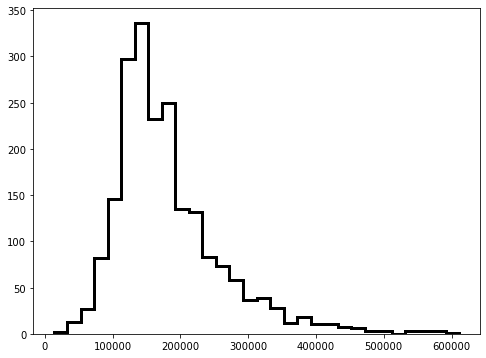

In [18]:
#plot salesprice histogram
price = ames_df['SalePrice']
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(price, bins=30, histtype='step', color='black', linewidth=3)
plt.show()

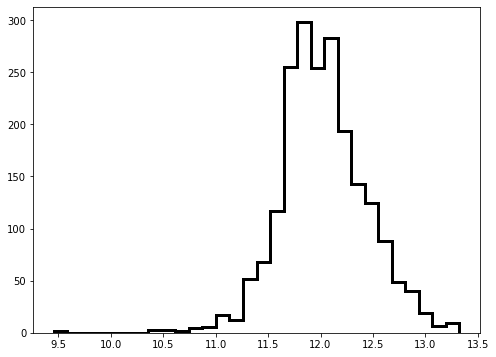

In [19]:
#plot salesprice histogram
logprice = np.log(ames_df['SalePrice'])
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(logprice, bins=30, histtype='step', color='black', linewidth=3)
plt.show()

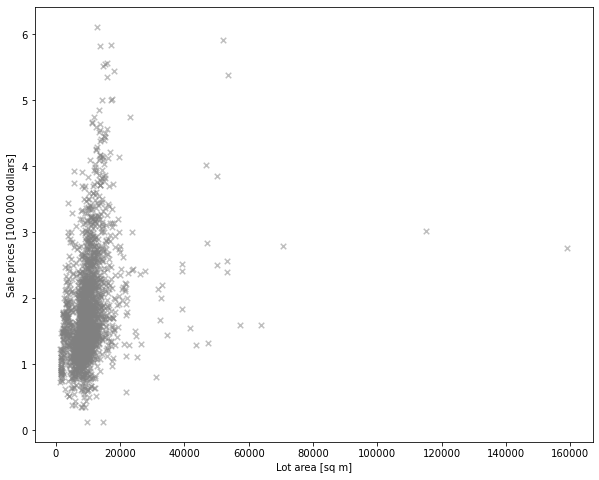

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(area, price/1e5, s=30, marker='x', color='grey', alpha=0.5)
ax.set_xlabel('Lot area [sq m]')
ax.set_ylabel('Sale prices [100 000 dollars]')
plt.show()

In [45]:
print(np.sum(ames_df['Alley'].isna()))
ames_df['Alley'].value_counts()


1911


Grvl    85
Pave    55
Name: Alley, dtype: int64

In [49]:
print(np.sum(ames_df['Street'].isna()))
ames_df['Street'].value_counts()


0


Pave    2044
Grvl       7
Name: Street, dtype: int64

In [50]:
print(np.sum(ames_df['Neighborhood'].isna()))
ames_df['Neighborhood'].value_counts()

0


NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [83]:
#make bar plot of missing values
nan_l, col_l = [], []
for i, col in enumerate(ames_df.columns): 
    mval = ames_df[col].isna().sum()
    if mval > 0: 
        nan_l.append(mval)
        col_l.append(col)

In [84]:
print(nan_l, col_l)

[330, 1911, 22, 22, 55, 55, 58, 55, 1, 56, 1, 1, 1, 2, 2, 1000, 113, 114, 114, 1, 1, 114, 114, 2042, 1651, 1986] ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
